In [15]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.close('all')
from matplotlib import rcParams, cycler

In [4]:
DATA_PATH = "data/period_indicators.csv"

file = pd.read_csv(DATA_PATH)
data = pd.DataFrame(file, columns= ['Location', 'MidPeriod', 'TFR'])
data[['MidPeriod', 'TFR']] = data[['MidPeriod', 'TFR']].apply(pd.to_numeric)
data[['MidPeriod']] = data[['MidPeriod']].subtract(3) #MidPeriod -> Start of the period
data.columns = ['Location', 'Time', 'TFR']

In [5]:
data_loc = data.loc[data['Location'] == 'Philippines']
data_loc = data_loc.loc[(data_loc['Time'] <= 2020)]
print(data_loc)

          Location  Time    TFR
10140  Philippines  1950  7.420
10141  Philippines  1955  7.269
10142  Philippines  1960  6.981
10143  Philippines  1965  6.539
10144  Philippines  1970  5.977
10145  Philippines  1975  5.462
10146  Philippines  1980  4.922
10147  Philippines  1985  4.527
10148  Philippines  1990  4.138
10149  Philippines  1995  3.900
10150  Philippines  2000  3.700
10151  Philippines  2005  3.300
10152  Philippines  2010  3.050
10153  Philippines  2015  2.580
10154  Philippines  2020  2.454


Text(0.5, 1.0, 'Philippines')

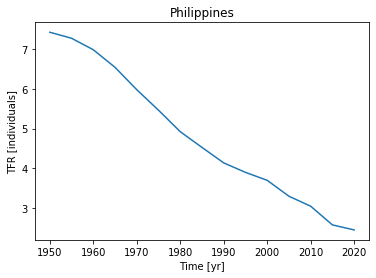

In [8]:
fig = plt.figure()

y = data_loc['TFR']
x = data_loc['Time']
plt.plot(x, y)
    
plt.xlabel('Time [yr]')
plt.ylabel('TFR [individuals]')
plt.title('Philippines')

In [10]:
fig.savefig('outputs/TFR_PH.png', dpi=100)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


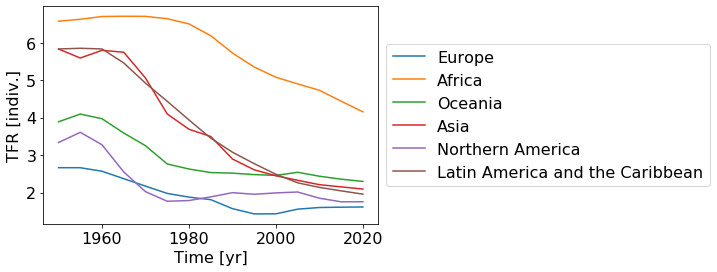

In [16]:
# Plot of all regions

regions = ['Europe', 'Africa', 'Oceania', 'Asia', 'Northern America', 'Latin America and the Caribbean'];
dates = np.asarray(data_loc['Time'].drop_duplicates())

fig = plt.figure()

for k in range(1, 7):
    data_spec = data.loc[data['Location'] == regions[k-1]]
    data_spec = data_spec.loc[data_spec['Time'] <= 2020]
    y = data_spec['TFR']
    x = data_spec['Time']
    plt.plot(x, y, label=regions[k-1])
    
plt.xlabel('Time [yr]')
plt.ylabel('TFR [indiv.]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.savefig('TFR_world.eps', dpi=100, bbox_inches = "tight")

## Creating TFR input

In [11]:
data_file = pd.DataFrame()
data_file['Time'] = x
data_file['TFR'] = y

In [12]:
data_file.to_csv("TFR_PH.csv")